# Nama: Agsel Falana Suparlan Putra
# nim: 2209106046
# POSTTEST 7 KECERDASAN BUATAN
### Link Dataset: https://www.kaggle.com/datasets/iiplutocrat45ii/painting-vs-photograph-classification-dataset

#### Tahap 1:
##### kita install kaggle, membuat direktori kaggle, mendownload dataset kaggle dan mengekstrak datasetnya

In [19]:
!pip install kaggle

In [20]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [21]:
!kaggle datasets download -d iiplutocrat45ii/painting-vs-photograph-classification-dataset

100% 430M/430M [00:15<00:00, 29.1MB/s]
100% 430M/430M [00:15<00:00, 29.2MB/s]


In [22]:
!unzip 'painting-vs-photograph-classification-dataset.zip'

Output streaming akan dipotong hingga 5000 baris terakhir.
  inflating: train/photos/94c54a8fcc7cb14074ac10a5ef6e298149b8c007.jpg  
  inflating: train/photos/94e1bd10bf9907516c0294e1727e1a5972c84366.jpg  
  inflating: train/photos/94f513b161445c2f22f892a7779ae45430ce3d18.jpg  
  inflating: train/photos/94f792a9ad417f11e3aa0b81c2cd169164d56968.jpg  
  inflating: train/photos/94fdaa407e1c70ba174386c78a09c144f7ae9047.jpg  
  inflating: train/photos/950ec8ecccc507bd9f1b43a1404463869edb77f4.jpg  
  inflating: train/photos/9524e0e16c6beb7f5b269ac7d71119e9c8c33911.jpg  
  inflating: train/photos/9528139eeacb163e1fd3c137c3a256c22ac35922.jpg  
  inflating: train/photos/953b557dce5782f4895bc38a715390ec040b154a.jpg  
  inflating: train/photos/95459b5d59475416ced7328590257ec5eb507f96.jpg  
  inflating: train/photos/954f04f1c988bbd2f372ae13ab739f465b5462b7.jpg  
  inflating: train/photos/961b595b676ad5f97b9a3528f3bf0e4a2963a538.jpg  
  inflating: train/photos/961c529e786a0763ff4a76f93113ffaa8dcce14

#### Tahap 2
##### Memanggil library yang ingin digunakan

In [41]:
import os
import pathlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings("ignore")
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from tensorflow.keras import Input, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy
import tensorflow_hub as hub

#### Tahap 3
##### Menginstal dan mengimport splitfolders, lalu kita membagi dataset dengan 3 bagian

In [42]:
!pip install split-folders
import splitfolders

In [43]:
splitfolders.ratio("Raw Data", output="dataset_final", seed=1337, ratio=(.8, .1, .1))

Copying files: 5108 files [00:00, 6541.40 files/s]


#### Tahap 5
##### melakukan augmentasi dataset

In [44]:
data_gen = ImageDataGenerator(rescale = 1/255., validation_split = 0.2)

train_data = data_gen.flow_from_directory('/content/dataset_final/train',
                                          target_size = (224, 224),
                                          batch_size = 32,
                                          subset = 'training',
                                          class_mode = 'binary')
val_data = data_gen.flow_from_directory('/content/dataset_final/val',
                                        target_size = (224, 224),
                                        batch_size = 32,
                                        subset = 'validation',
                                        class_mode = 'binary')

Found 3269 images belonging to 2 classes.
Found 101 images belonging to 2 classes.


#### Tahap 6
##### Menampilkan label dan class label, lalu kita tampilkan 10 foto random

In [46]:
images, labels = train_data.next()
len(images), len(labels), images[0].shape

(32, 32, (224, 224, 3))

In [47]:
data_directory = pathlib.Path('/content/Raw Data')
class_names = [item.name for item in data_directory.glob('*')][:2]
print(class_names)

['painting', 'photos']


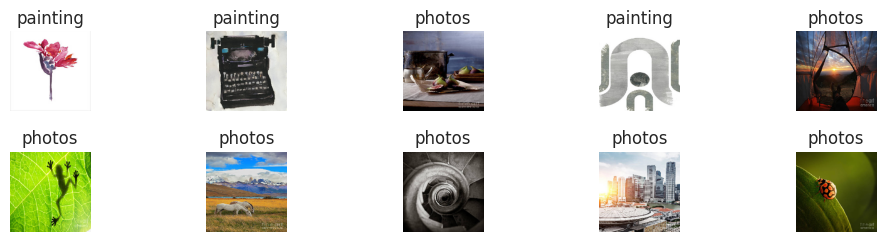

In [49]:
def plot_random_images():
    images, labels = train_data.next()
    labels = labels.astype('int32')
    i = 1

    plt.figure(figsize = (10, 5))

    for image, label in zip(images, labels):
        plt.subplot(4, 5, i)
        plt.imshow(image)
        plt.title(class_names[label])
        plt.axis('off')
        i += 1
        if i == 11:
            break

    plt.tight_layout()
    plt.show()

plot_random_images()


#### Tahap 7
##### Melakukan squential model dan melatih data mencari akurasi dan loss lalu menampilkan hasil evaluate dataset yang telah dilatih

In [52]:
model = tf.keras.Sequential([
            tf.keras.Input(shape = images[0].shape),
            tf.keras.layers.Conv2D(32, (3, 3), padding='same', activation='relu'),
            tf.keras.layers.MaxPooling2D((2, 2), strides=2),
            tf.keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
            tf.keras.layers.MaxPooling2D((2, 2), strides=2),
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(128, activation = 'relu'),
            tf.keras.layers.Dense(2, activation = 'softmax'),
])


model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [54]:
classifier = model.fit(train_data, batch_size = 32,
                                 epochs = 5,
                                 validation_data = val_data,
                                 verbose = 1)

Epoch 1/5
103/103 [==============================] - 9s 86ms/step - loss: 0.4883 - accuracy: 0.7336 - val_loss: 0.4068 - val_accuracy: 0.7327
Epoch 2/5
103/103 [==============================] - 9s 85ms/step - loss: 0.4186 - accuracy: 0.8146 - val_loss: 0.3486 - val_accuracy: 0.8218
Epoch 3/5
103/103 [==============================] - 9s 85ms/step - loss: 0.2742 - accuracy: 0.8813 - val_loss: 0.2803 - val_accuracy: 0.8713
Epoch 4/5
103/103 [==============================] - 8s 81ms/step - loss: 0.1600 - accuracy: 0.9422 - val_loss: 0.4721 - val_accuracy: 0.8020
Epoch 5/5
103/103 [==============================] - 10s 93ms/step - loss: 0.1070 - accuracy: 0.9602 - val_loss: 0.3540 - val_accuracy: 0.8119


In [55]:
model.evaluate(val_data)

4/4 [==============================] - 0s 58ms/step - loss: 0.3540 - accuracy: 0.8119


[0.35401594638824463, 0.8118811845779419]

#### Tahap 8
##### menampilkan hasil pelatihan dataset dalam bentuk grafik garis

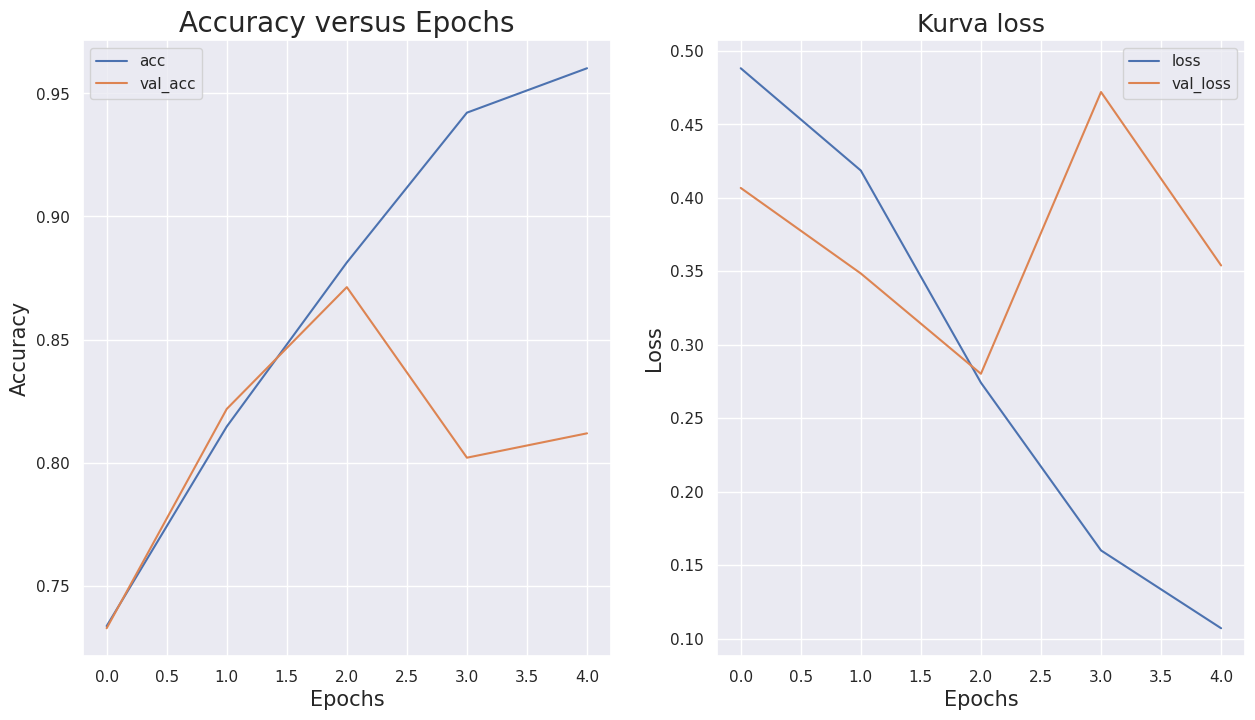

In [57]:
def model_performance_graphs():

    fig, axes = plt.subplots(1, 2, figsize = (15, 8))

    axes[0].plot(classifier.epoch, classifier.history['accuracy'], label = 'acc')
    axes[0].plot(classifier.epoch, classifier.history['val_accuracy'], label = 'val_acc')
    axes[0].set_title('Accuracy versus Epochs', fontsize = 20)
    axes[0].set_xlabel('Epochs', fontsize = 15)
    axes[0].set_ylabel('Accuracy', fontsize = 15)
    axes[0].legend()

    axes[1].plot(classifier.epoch, classifier.history['loss'], label = 'loss')
    axes[1].plot(classifier.epoch, classifier.history['val_loss'], label="val_loss")
    axes[1].set_title("Kurva loss",fontsize=18)
    axes[1].set_xlabel("Epochs",fontsize=15)
    axes[1].set_ylabel("Loss",fontsize=15)
    axes[1].legend()

    plt.show()

model_performance_graphs()
